<a href="https://colab.research.google.com/github/ITMK/DataLitMT/blob/main/colab_notebook_basic_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

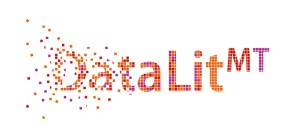

# Data Planning and Data Collection – Basic Level
**How to select, download, prepare and process data for training NMT models**

# Introduction


This Colab Notebook is concerned with the Data Planning and Data Collection (& Production) dimensions of the [DataLit<sup>MT</sup> Competence Matrix](https://itmk.github.io/The-DataLitMT-Project/matrix/). The notebook guides you step-by-step through gathering, preparing and processing data in order to train a neural machine translation (NMT) model, using, for example the [OpenNMT-py toolkit](https://opennmt.net/OpenNMT-py/). These steps are the central preparatory steps of an MT training pipeline, which is covered under *Technical MT Literacy* in the [Professional Machine Translation Literacy Framework](https://itmk.github.io/The-DataLitMT-Project/framework/#professional-mt-literacy). The code sections of this notebook are based on [Yasmin Moslem's repository for MT data preparation](https://github.com/ymoslem/MT-Preparation). You might also be interested in [this TAUS article on data cleaning for natural language processing](https://www.taus.net/resources/blog/ten-step-guide-to-data-cleaning), which highlights the various steps of a data cleaning pipeline. The first five steps discussed in this article are also covered in this notebook.

**General Information**

NMT models are trained on large datasets in the form of bilingual text corpora, which are aligned at sentence-level. NMT models are very sensitive to defects (also called 'noise') in their training data, as described, for example, in [Khayrallah/Koehn (2018)](https://aclanthology.org/W18-2709/). Therefore, thoroughly preparing the training datasets (cleaning, filtering, aligning, tokenizing, etc.) is paramount for creating high-quality NMT models.

**Note:** To avoid losing your data produced throughout this notebook, do **not** close this window until you have completed all steps and downloaded the datasets locally or saved them to your Google Drive! This step is illustrated at the end of this notebook.

A walk-through of this notebook and more detailed information on gathering and preparing data is provided in the accompanying tutorial video.

---
**Steps to take**

As outlined in our DataLit<sup>MT</sup> Competence Matrix, a number of steps have to be taken to acquire data for training an NMT model. A **data requirement analysis** will show you which bilingual (also called parallel) data will be needed for training an NMT model that suits your individual requirements (domain, language combination, etc.). For more information on how to create custom machine translation models, see the chapter by [Ramírez-Sánchez (2022)](https://zenodo.org/record/6760022/files/342-Kenny-2022-9.pdf). Based on your data requirement analysis, you can then develop a **data strategy**, which will outline the steps required to obtain the data. Taking into account relevant aspects of **data curation and protection**, you can then identify and evaluate suitable sources for downloading bilingual datasets. For example, one source of publicly available parallel datasets, which can be used for training NMT models, is the [OPUS corpus collection](https://opus.nlpl.eu). Most datasets in the OPUS collection are available for non-commercial (research) use and can be searched by simply selecting a source and a target language. Once you have found a suitable dataset, you can **verify** this data by checking the type of dataset (web-crawled etc.) and clicking on *sample* to check the quality of the data. For MT, [moses](http://www2.statmt.org/moses/index.php?n=Main.HomePage) is used as the preferred download format, as the sentences are already aligned (meaning that every line in the source file refers to that same line in the target file, i.e., these lines are translations of each other). You can then **acquire** the data by clicking on the *moses* field or by running the cell below (when you right-click on the *moses* field of the dataset you selected on the OPUS website, you can copy the link to download the dataset. This is also shown in the accompanying tutorial video).

For our current MT project scenario, we choose to work with the English-German parallel dataset *TED2020*, where we chose English as the source and German as the target language. When running the cell below, a .zip file will be downloaded and the two files we're interested in are those that end on the language codes: `.en` and `.de`. The data we prepare and save in this notebook can then be used to train an NMT model from scratch using our [NMT Training notebook](https://colab.research.google.com/drive/1f3V7CshfVvrA5S6XtLAvl-beqBPN3qar?usp=sharing).

Note: TED2020 is a comparatively small dataset for NMT training, containing 'only' 300,000 parallel sentences (more information on this dataset can be found [here](https://opus.nlpl.eu/TED2020.php)). This is sufficient to train a demo NMT model and to go through all steps required. Note, however, that datasets for training more efficient and high-performing NMT models, usually contain millions of sentences.

Run the following cell to download the dataset from the OPUS collection.

In [ ]:
!wget https://object.pouta.csc.fi/OPUS-TED2020/v1/moses/de-en.txt.zip
!unzip de-en.txt.zip

--2023-02-17 17:12:17--  https://object.pouta.csc.fi/OPUS-TED2020/v1/moses/de-en.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21857900 (21M) [application/zip]
Saving to: ‘de-en.txt.zip’

de-en.txt.zip       100%[===================>]  20.84M  12.5MB/s    in 1.7s    

2023-02-17 17:12:20 (12.5 MB/s) - ‘de-en.txt.zip’ saved [21857900/21857900]

Archive:  de-en.txt.zip
  inflating: README                  
  inflating: LICENSE                 
  inflating: TED2020.de-en.de        
  inflating: TED2020.de-en.en        
  inflating: TED2020.de-en.xml       


This should give you the two monolingual files:

*   `TED2020.de-en.en`
*   `TED2020.de-en.de`

Note: We will not be working with the third file, i.e., the xml file.

Each file has a sentence/segment per line that is a matching (aligned) translation of the same line in the other file (this is called [parallel text format](https://google.github.io/seq2seq/nmt/)).

Note: If you wish to download a different dataset, just change the URL in the code cell above (make sure, that the data is still in *moses* format).

# Data Preparation

Now we move on to filtering, **preparing and processing** this dataset. At the end of the notebook, we will show you how to download the resulting datasets to a local drive or how to save them to your Google Drive. After making sure that the data intended to train an NMT model is a bilingual dataset aligned at sentence-level, we can take different steps in order to clean this MT training data. These steps are outlined below.

**Installing Necessary Library-Requirements**

First, we'll install a range of necessary python libraries which are required for our data preparation steps. To do so, simply run the cells below.

In [ ]:
!pip install numpy
!pip install pandas
!pip install sacremoses
!pip install sentencepiece

**Cloning the DataLit<sup>MT</sup>-GitHub Repository**

Next, we'll clone our [DataLit<sup>MT</sup> Github Repository](https://github.com/ITMK/DataLitMT) in order to get access to pre-written code that we'll use in this notebook. Again, just run the cell below.

In [ ]:
!git clone https://github.com/ITMK/DataLitMT.git

**Defining Datasets and Languages**

Now, we'll define our source file and language (source dataset, English) as well as our target file and language (target dataset, German) based on the *TED2020* dataset we downloaded in the previous step. Simply run the cell below. From now on, we'll work with the variables `source_file`, `target_file`, `source_lang` and `target_lang`.

In [ ]:
source_file = "TED2020.de-en.en"
target_file = "TED2020.de-en.de"
source_lang = "en"
target_lang = "de"

Note: If you have downloaded a different dataset, simply change the names and languages (marked in red) in the strings above to match your data.

**Filtering & Cleaning Datasets for MT Training**

Now we move on to actually filtering and cleaning the dataset, as required for MT training purposes. This step will take the source and target files of the dataset and delete rows that contain empty cells, delete duplicates, source-copied rows and source/target sentences that are too long, remove HTML code, list how many rows will remain in true-cased form, delete rows with empty cells, shuffle rows and finally save the source and target files (= the filtered dataset). You can find more information on these data preparation steps in section 3 of [Bui et al. (2020)](https://aclanthology.org/2020.eamt-1.35). The final files will be adequately filtered and cleaned for our NMT training purposes. Again, run the cell below.

In [ ]:
# Arguments: source file, target file, source language, target language
!python3 DataLitMT/learning_resources/data_planning_and_collection/filter.py TED2020.de-en.en TED2020.de-en.de en de

As an output, you should now have the two filtered and cleaned source and target files:

*  source data: `TED2020.de-en.en-filtered.en`
*  target data: `TED2020.de-en.de-filtered.de`



**Checking the Dataset** 

It is always good practice to check your dataset in between steps to make sure that everything has worked well. For example, you could check that sentences are properly aligned. Run the cell below to print the first and last two lines of the filtered and cleaned source and target files.

In [ ]:
print("First 2 Lines:")
!head -n 2 'TED2020.de-en.en-filtered.en' && echo "----" && head -n 2 'TED2020.de-en.de-filtered.de'
print()
print("Last 2 Lines:")
!tail -n 2 'TED2020.de-en.en-filtered.en' && echo "-----" && tail -n 2 'TED2020.de-en.de-filtered.de'

# (Subword) Tokenizing with SentencePiece

For the next step of our data preparation pipeline, we will tokenize the previously filtered datasets. This is a necessary step for MT training. Unlike humans, a computer does not read text in the form of individual words and sentences, but rather as a continuous string of characters (blank spaces included). Therefore, text (vocabulary) used to train MT models (and other Natural Language Processing or NLP models) must be tokenized so that the models know where the boundaries between individual words (and sentences) are.

A special form of tokenization is subwording, where words are split into smaller units (so-called subwords) from which complete words can be assembled. The subword tokenization method is described in more detail in [Sennrich et al. (2016)](https://aclanthology.org/P16-1162/). NMT models are usually trained with such subwords instead of whole words in order to reduce the size of the NMT model’s vocabulary (the larger the vocabulary, the higher the data processing requirements will be). For example, the four words *low*, *lowest*, *high* and *highest* can be represented by the three subwords *low*, *high* and *est*, which would reduce the required vocabulary size of the NMT model by 1. During translation, when the MT model comes across a new word/token that resembles a word/token that is also present in its training vocabulary (or can be assembled from the subwords in this vocabulary), the MT model will be able to translate this word/token. Otherwise, it would produce an “unk” (= “unknown”) token as output. If you would like to know more about (subword) tokenization for training NLP models, have a look at [this article](https://blog.floydhub.com/tokenization-nlp/).

A preferred toolkit for subword tokenization is [SentencePiece](https://github.com/google/sentencepiece). To apply SentencePiece, a subwording model must first be trained on the source and target files of the dataset. This model can then be applied to these files in order to subword them. These subworded source and target files are then used in the MT training process. When the trained model is used for translating, it will produce a subworded translation. Using the same SentencePiece model, this subworded translation must then be “desubworded” or “decoded” back into fluent text. Note that in systems such as DeepL or Google Translate, these subwording and desubwording steps are performed "backstage" so that we as users are not aware of them.

Run the code below to train a SentencePiece model for subword tokenization based on the two previously filtered files: `TED2020.de-en.en-filtered.en` and `TED2020.de-en.de-filtered.de`.

In [ ]:
# Train a SentencePiece model for subword tokenisation
!python DataLitMT/learning_resources/data_planning_and_collection/train_unigram.py TED2020.de-en.en-filtered.en TED2020.de-en.de-filtered.de

We have now trained two separate SentencePiece subwording models: `source.model` and `target.model`. At the end of this notebook, we will also save the subworded source and target model as these will be needed for future subwording and desubwording operations (the subwording and desubwording step is also required in the [NMT Training notebook](https://colab.research.google.com/drive/1f3V7CshfVvrA5S6XtLAvl-beqBPN3qar?usp=sharing)).

**Subwording the filtered source and target datasets**

By applying these source and target SentencePiece models, our previously filtered files can now be subworded. To do so, run the code below.

In [ ]:
# Subword the dataset
!python3 DataLitMT/learning_resources/data_planning_and_collection/subword.py source.model target.model TED2020.de-en.en-filtered.en TED2020.de-en.de-filtered.de

As an output, you should now have two subworded datasets:

*   source dataset: `TED2020.de-en.en-filtered.en.subword`
*   target dataset: `TED2020.de-en.de-filtered.de.subword`

Note: We will cover **desubwording** at the end of the [NMT Training notebook](https://colab.research.google.com/drive/1f3V7CshfVvrA5S6XtLAvl-beqBPN3qar?usp=sharing).

**Checking the Dataset** 

Again, you can check your dataset to make sure that they have been properly subworded. Run the cell below to print the first and last two lines of each filtered and subworded file.

In [ ]:
print("First 2 Lines:")
!head -n 2 'TED2020.de-en.en-filtered.en.subword' && echo "----" && head -n 2 'TED2020.de-en.de-filtered.de.subword'
print()
print("Last 2 Lines:")
!tail -n 2 'TED2020.de-en.en-filtered.en.subword' && echo "-----" && tail -n 2 'TED2020.de-en.de-filtered.de.subword'

Note: The underscores indicate that there is a space before the respective tokens, meaning that, in a sentence, word tokens with an underscore preceding them can act as independent words. Word tokens without an underscore (not included in our example sentences above) could only act as suffixes to other word tokens. If you can see a question mark token at the beginning of a sentence, for example, you'll notice it is missing an underscore. This means that there is no space before this token and that it therefore always follows a preceding token without a space between the two (which is how we actually use a question mark in language). This becomes clearer when you compare a subworded and a desubworded translation output in our [NMT Training notebook](https://colab.research.google.com/drive/1f3V7CshfVvrA5S6XtLAvl-beqBPN3qar?usp=sharing).

# Splitting Datasets

Now that we have cleaned, filtered and subworded the source and target files in our dataset, we need to **split** this dataset for MT training purposes. 

To train an NMT model, three distinct sub-datasets (of both the source and the target files) are required:

1. **training dataset** – used to actually train the model,
2. **development dataset** – used to run regular validations during the training stage of the NMT model to help improve the model parameters,
3. **test dataset** – used after the model is fully trained to evaluate the model on data the model has not yet seen in the training stage (to provide a test translation).

The training dataset should be by far the largest of the three datasets and represent about 70-80% of the original dataset. Both the development and the test datasets can be of equal size of around 10-15% of the original dataset.

Note: Our total TED2020 dataset contains 300,000 segments (as described in the introduction), so for this MT project, we define the development and test sub-datasets to consist of 35,000 segments each (a little more than 10% each, as indicated in the cell below). This means that the training dataset will consist of 216,843 segments (almost 80%, as indicated above). Run the cell below to simultaneously split both the source and the target files of the original dataset into three sub-datasets: a training, development and a test dataset.

In [ ]:
# Split the dataset into training set, development set, and test set
!python DataLitMT/learning_resources/data_planning_and_collection/train_dev_test_split.py 35000 35000 TED2020.de-en.en-filtered.en.subword TED2020.de-en.de-filtered.de.subword

You should now have the following six sub-datasets:

*  source training dataset: `TED2020.de-en.en-filtered.en.subword.train`
*  source development dataset: `TED2020.de-en.en-filtered.en.subword.dev`
*  source test dataset: `TED2020.de-en.en-filtered.en.subword.test`
*  target training dataset: `TED2020.de-en.de-filtered.de.subword.train`
*  target development dataset: `TED2020.de-en.de-filtered.de.subword.dev`
*  target test (reference) dataset: `TED2020.de-en.de-filtered.de.subword.test`


**Checking the Datasets** 

As before, you can check your datasets to make sure that they have been split properly. As mentioned above, you should have a total of six sub-datasets. Run the cell below to print the number of segments of each sub-dataset to confirm that they are of equal length, for both the source and the target dataset.

In [ ]:
print("Line count for Source Train, Development and Test Datasets:")
!wc -l 'TED2020.de-en.en-filtered.en.subword.train'
!wc -l 'TED2020.de-en.en-filtered.en.subword.dev'
!wc -l 'TED2020.de-en.en-filtered.en.subword.test'
print()
print("Line count for Target Train, Development and Test Datasets:")
!wc -l 'TED2020.de-en.de-filtered.de.subword.train'
!wc -l 'TED2020.de-en.de-filtered.de.subword.dev'
!wc -l 'TED2020.de-en.de-filtered.de.subword.test'

Line count for Source Train, Development and Test Datasets:
216843 TED2020.de-en.en-filtered.en.subword.train
35000 TED2020.de-en.en-filtered.en.subword.dev
35000 TED2020.de-en.en-filtered.en.subword.test

Line count for Target Train, Development and Test Datasets:
216843 TED2020.de-en.de-filtered.de.subword.train
35000 TED2020.de-en.de-filtered.de.subword.dev
35000 TED2020.de-en.de-filtered.de.subword.test


Congratulations! You have now selected, downloaded, cleaned, filtered, tokenized and split source and target datasets for MT training purposes!

We could now feed these prepared datasets into an MT system to create a trained MT model that could be employed in an MT-assisted translation scenario. How to use this data to train an NMT model is shown in our [NMT Training notebook](https://colab.research.google.com/drive/1f3V7CshfVvrA5S6XtLAvl-beqBPN3qar?usp=sharing).

# Saving Datasets

Currently, our datasets are simply saved locally in this notebook. Of course we do not want to lose these datasets (which would happen if you closed this window or the runtime was interrupted). There are two ways to save the datasets. One option is to locally download and save them, and the second option is to connect this notebook to your Google Drive and directly save the datasets in a Google Drive folder. The second step is recommended as we will later access the prepared datasets in Google Drive to train an NMT model in our [NMT Training notebook](https://colab.research.google.com/drive/1f3V7CshfVvrA5S6XtLAvl-beqBPN3qar?usp=sharing).

## Option 1: Saving Datasets Locally

On the left-hand-side of this notebook, there is an icon indicating a folder with your files (as created in this session). By clicking on the three vertical dots on the right of the file you wish to download (for example,`TED2020.de-en.en-filtered.en.subword.train`), you can choose to download the file locally. This is also shown in the tutorial video. You can then save and upload the file on your notebook/desktop PC, or onto Google Drive. You can do this with all six prepared datasets (source train, dev and test dataset, and target train, dev and test dataset) and the subworded source and target models.

## Option 2: Connecting to Your Google Drive

Another, preferred, option is to connect this notebook to your Google Drive and directly save the datasets into a Drive folder of your choice. To connect this notebook to Google Drive, run the cell below. You will need to select and confirm your Google Account. This step is also shown in the tutorial video.

If connecting to Google Drive was successful, the cell below will output “Drive Mounted”  or a similar message.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Copy your data to your Google Drive**

Now that this notebook is connected to your Google Drive, you can simply run the cell below to copy and save your six sub-datasets and your two subworded models to your Google Drive. 

**Do not** change the names of the files (datasets) as they need to match the variable names as we have been using them in this notebook for the NMT Training notebook.

The path **'drive/MyDrive/'** is a must and the datasets would be directly saved into your main drive folder. Run the cell below to save the files into your general Drive folder.

In [ ]:
# Copy subworded models to your drive
! cp source.model 'drive/MyDrive/'
! cp target.model 'drive/MyDrive/'

# Copy source files to your drive
! cp TED2020.de-en.en-filtered.en.subword.train 'drive/MyDrive/'
! cp TED2020.de-en.en-filtered.en.subword.dev 'drive/MyDrive/'
! cp TED2020.de-en.en-filtered.en.subword.test 'drive/MyDrive/'

# Copy target files to your drive
! cp TED2020.de-en.de-filtered.de.subword.train 'drive/MyDrive/'
! cp TED2020.de-en.de-filtered.de.subword.dev 'drive/MyDrive/'
! cp TED2020.de-en.de-filtered.de.subword.test 'drive/MyDrive/'

Once you've run the cell above, you can check your Google Drive and should find the six sub-datasets and the two subword models saved there. If you like, you can then change the names of the datasets directly in your drive for further use. You can also check whether you have successfully saved the datasets in your Google Drive by checking your Drive content. Run the following cell and the output should list your files.

In [ ]:
!ls 'drive/MyDrive/'

**Otherwise** you can **create a folder** for this purpose (let's say *MT_data_preparation*) and save the files directly into that folder (this is a preferred option). You would then need to change the path to your newly created folder *'drive/MyDrive/MT_data_preparation'*. This step is also shown in the tutorial video.

In [ ]:
## Preferably create your own folder MT_data_preparation and copy each file into that folder
# Copy subworded models to your drive
! cp source.model 'drive/MyDrive/MT_data_preparation/' 
! cp target.model 'drive/MyDrive/MT_data_preparation/'

# Copy source files to your drive
! cp TED2020.de-en.en-filtered.en.subword.train 'drive/MyDrive/MT_data_preparation/'
! cp TED2020.de-en.en-filtered.en.subword.dev 'drive/MyDrive/MT_data_preparation/'
! cp TED2020.de-en.en-filtered.en.subword.test 'drive/MyDrive/MT_data_preparation/'

# Copy target files to your drive
! cp TED2020.de-en.de-filtered.de.subword.train 'drive/MyDrive/MT_data_preparation/'
! cp TED2020.de-en.de-filtered.de.subword.dev 'drive/MyDrive/MT_data_preparation/'
! cp TED2020.de-en.de-filtered.de.subword.test 'drive/MyDrive/MT_data_preparation/'

If you have created your own folder *MT_data_preparation* and saved the files to that folder, run the cell below,

In [ ]:
# Alternatively run:
!ls 'drive/MyDrive/MT_data_preparation'

source.model
target.model
TED2020.de-en.de-filtered.de.subword.dev
TED2020.de-en.de-filtered.de.subword.test
TED2020.de-en.de-filtered.de.subword.train
TED2020.de-en.en-filtered.en.subword.dev
TED2020.de-en.en-filtered.en.subword.test
TED2020.de-en.en-filtered.en.subword.train


Congratulations! You have now successfully saved all MT datasets and subworded models created in this notebook. You will profit from these preparatory steps when training an actual NMT model, as we will show you in our [NMT Training notebook](https://colab.research.google.com/drive/1f3V7CshfVvrA5S6XtLAvl-beqBPN3qar?usp=sharing).